In [1]:
#For Data Manipulation
import numpy as np
import pandas as pd
from datetime import datetime

#For Getting Stocks Data 
import pandas_datareader

#For Visualizing the plots
import matplotlib.pyplot as plt

#For Interactive Controls
import ipywidgets as widgets

%matplotlib inline

In [2]:
#List of Billionaire Favorite Stocks
LIST = ['JILL','ELTK','ONVO','UAVS','AEY','OBLN','XRF','MLSS','MICT','SOLY','NMRD','ZFGN','INUV','VTGN','RBZ','BURG','MTSL','DXR','QADA','MYOV','BOSC','APTO','PESI','TITN','EYEG','CAPR','UROV','APDN','TTPH','ECOR','WYND','ZN','OSN','HDSN','BDR','TBLT','PLM','DMRC','MOV','PVH','TLYS','CPAH','VLRX','SDRL','RWLK','VEEV','OPRX','RAVE','PFSW','SPWH','TMDX','DOOO','TC','NBY','WSTL','KEYS','DBI','INAP','RVLT','JASN','CNET','RVLV','REKR','SUMR','MBOT','BDGE','FOLD','SRRA','IDN','PIXY','AAC','LYL','MHLD','NIO','SLS','NNVC','MYT','BYND','CREG','ATIS','TCCO','AAMC','OXBR','ANCN','BCRX','ALRN','RTW','LTBR','WWR','CTRC','VTVT','MACK','NDRA','OTLK','MYT','BYND','CREG','ATIS','TCCO','AAMC','OXBR','ANCN','BCRX','ALRN','RTW','LTBR','WWR','HTHT','CTRC','MACK']
List = sorted(list(set(LIST)))
print(List)


returns_port = pd.DataFrame()

# Downloading the Stocks Adj Close Price from Yahoo and saving as dataframe
for i in List:
    one_stock = pandas_datareader.DataReader(i,'yahoo',datetime(2019,6,28),datetime(2019,8,31))
    #Calculating the Returns of the stock
    returns_one_stock = pd.DataFrame(np.diff(np.log(one_stock['Adj Close'].values)))
    returns_port = pd.concat([returns_port, returns_one_stock], axis=1)
returns_port.columns = List
returns_port.head()

['AAC', 'AAMC', 'AEY', 'ALRN', 'ANCN', 'APDN', 'APTO', 'ATIS', 'BCRX', 'BDGE', 'BDR', 'BOSC', 'BURG', 'BYND', 'CAPR', 'CNET', 'CPAH', 'CREG', 'CTRC', 'DBI', 'DMRC', 'DOOO', 'DXR', 'ECOR', 'ELTK', 'EYEG', 'FOLD', 'HDSN', 'HTHT', 'IDN', 'INAP', 'INUV', 'JASN', 'JILL', 'KEYS', 'LTBR', 'LYL', 'MACK', 'MBOT', 'MHLD', 'MICT', 'MLSS', 'MOV', 'MTSL', 'MYOV', 'MYT', 'NBY', 'NDRA', 'NIO', 'NMRD', 'NNVC', 'OBLN', 'ONVO', 'OPRX', 'OSN', 'OTLK', 'OXBR', 'PESI', 'PFSW', 'PIXY', 'PLM', 'PVH', 'QADA', 'RAVE', 'RBZ', 'REKR', 'RTW', 'RVLT', 'RVLV', 'RWLK', 'SDRL', 'SLS', 'SOLY', 'SPWH', 'SRRA', 'SUMR', 'TBLT', 'TC', 'TCCO', 'TITN', 'TLYS', 'TMDX', 'TTPH', 'UAVS', 'UROV', 'VEEV', 'VLRX', 'VTGN', 'VTVT', 'WSTL', 'WWR', 'WYND', 'XRF', 'ZFGN', 'ZN']


,AAC,AAMC,AEY,ALRN,ANCN,APDN,APTO,ATIS,BCRX,BDGE,...,VEEV,VLRX,VTGN,VTVT,WSTL,WWR,WYND,XRF,ZFGN,ZN
0,0.045462,0.043393,0.049393,-0.049832,0.000000,0.019803,0.011429,0.036149,-0.021334,0.000679,...,0.008354,-0.007663,-0.013793,-0.007018,-0.071656,-0.041891,0.028519,-0.091350,-0.016950,0.087011
1,0.134919,0.055862,-0.018238,0.010167,-0.050354,0.038466,-0.015268,0.000000,-0.032880,-0.021949,...,0.018966,0.041437,0.000000,0.020907,0.011364,0.029853,-0.006887,0.000000,0.025318,-0.087011
2,0.056619,0.000000,-0.012346,-0.002894,0.049461,-0.019048,0.077673,0.034887,0.027474,-0.001388,...,0.012408,0.050370,-0.028171,-0.020907,-0.017094,-0.031637,0.016361,-0.058182,0.000000,0.029853
3,-0.009217,-0.007905,0.048494,0.014389,-0.005376,0.000000,0.068756,-0.046792,0.010782,0.020279,...,0.008089,-0.028472,0.000000,0.007018,0.033902,0.052186,-0.000219,-0.069157,0.032790,-0.029853
4,0.096992,0.090972,0.000000,0.000000,0.000000,-0.019418,-0.016751,-0.006006,-0.021681,-0.007514,...,-0.012903,0.017890,-0.028988,0.000000,-0.022473,-0.034486,-0.009920,-0.061088,-0.008097,0.114410


In [3]:
portfolios = np.mat(returns_port)

FAMA_FRENCH = pd.read_csv('C:/Users/mohdn/Downloads/F-F_Research_Data_Factors_daily.csv')

symd = 20190628
eymd = 20190830

FAMA = FAMA_FRENCH.iloc[24515:24559,1:5].copy()
print(FAMA)

MKT = pd.DataFrame(FAMA['Mkt-RF'] -  FAMA['RF'])
SMB = pd.DataFrame(FAMA['SMB'])
HML = pd.DataFrame(FAMA['HML'])

MKT.reset_index(drop=True,inplace=True)
SMB.reset_index(drop=True,inplace=True)
HML.reset_index(drop=True,inplace=True)

[T,N] = portfolios.shape

m=np.ones((T,1))

F = np.concatenate((m,MKT,SMB,HML),axis=1)

factors = np.mat(F)

K = F.shape[1]

beta = np.mat(np.zeros((K,N)))
#eta = np.mat(np.zeros((K,N)))

# Step 1 Running Times Series Regression

for j in range(portfolios.shape[1]):
    x = factors
    y = portfolios[:,[j]]
    beta[:,[j]] = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y) 

       Mkt-RF   SMB   HML     RF
24515    0.75 -0.54 -0.18  0.009
24516    0.14 -0.81 -0.79  0.009
24517    0.78 -0.07 -0.31  0.009
24518   -0.10  0.17  0.89  0.009
24519   -0.58 -0.44  0.03  0.009
24520    0.18 -0.15 -0.53  0.009
24521    0.40 -0.16 -0.39  0.009
24522    0.19 -0.80  0.03  0.009
24523    0.53  0.19  0.44  0.009
24524   -0.04 -0.38 -0.99  0.009
24525   -0.32  0.33  0.15  0.009
24526   -0.64 -0.14 -0.68  0.009
24527    0.35 -0.32 -0.03  0.009
24528   -0.56  0.14  0.89  0.009
24529    0.25 -0.43 -0.50  0.009
24530    0.65 -0.21  0.82  0.009
24531    0.66  0.75  0.83  0.009
24532   -0.63 -0.70 -0.21  0.009
24533    0.82  0.39 -0.21  0.009
24534   -0.32 -0.33 -0.46  0.009
24535   -0.17  1.31  0.85  0.009
24536   -1.09  0.15  0.53  0.009
24537   -1.04 -0.47 -1.94  0.007
24538   -0.87 -0.31  0.04  0.007
24539   -3.07 -0.02 -0.02  0.007
24540    1.29 -0.43 -0.56  0.007
24541    0.07  0.06 -0.87  0.007
24542    1.97  0.08 -0.29  0.007
24543   -0.78 -0.38 -0.37  0.007
24544   -1

In [4]:
#Step 2. RUN CROSS-SECTIONAL REGRESSION
# ACTIVE RETURNS
lamb = np.zeros((K,T))
alpha = np.zeros((N,T))
sigma = np.zeros((T,N,N))

for i in range(portfolios.shape[0]):
    x = beta.T
    y = portfolios[[i],:].T
    lambdafun = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
    lamb[:,[i]] = lambdafun
    alpha[:,[i]] = np.subtract(y,np.matmul(x,lambdafun))
    sigma[[i],:,:] = np.matmul(alpha[:,[i]],alpha[:,[i]].T)

ALPHA = alpha.mean(axis =1)
SIGMA = sigma.mean(axis =0)

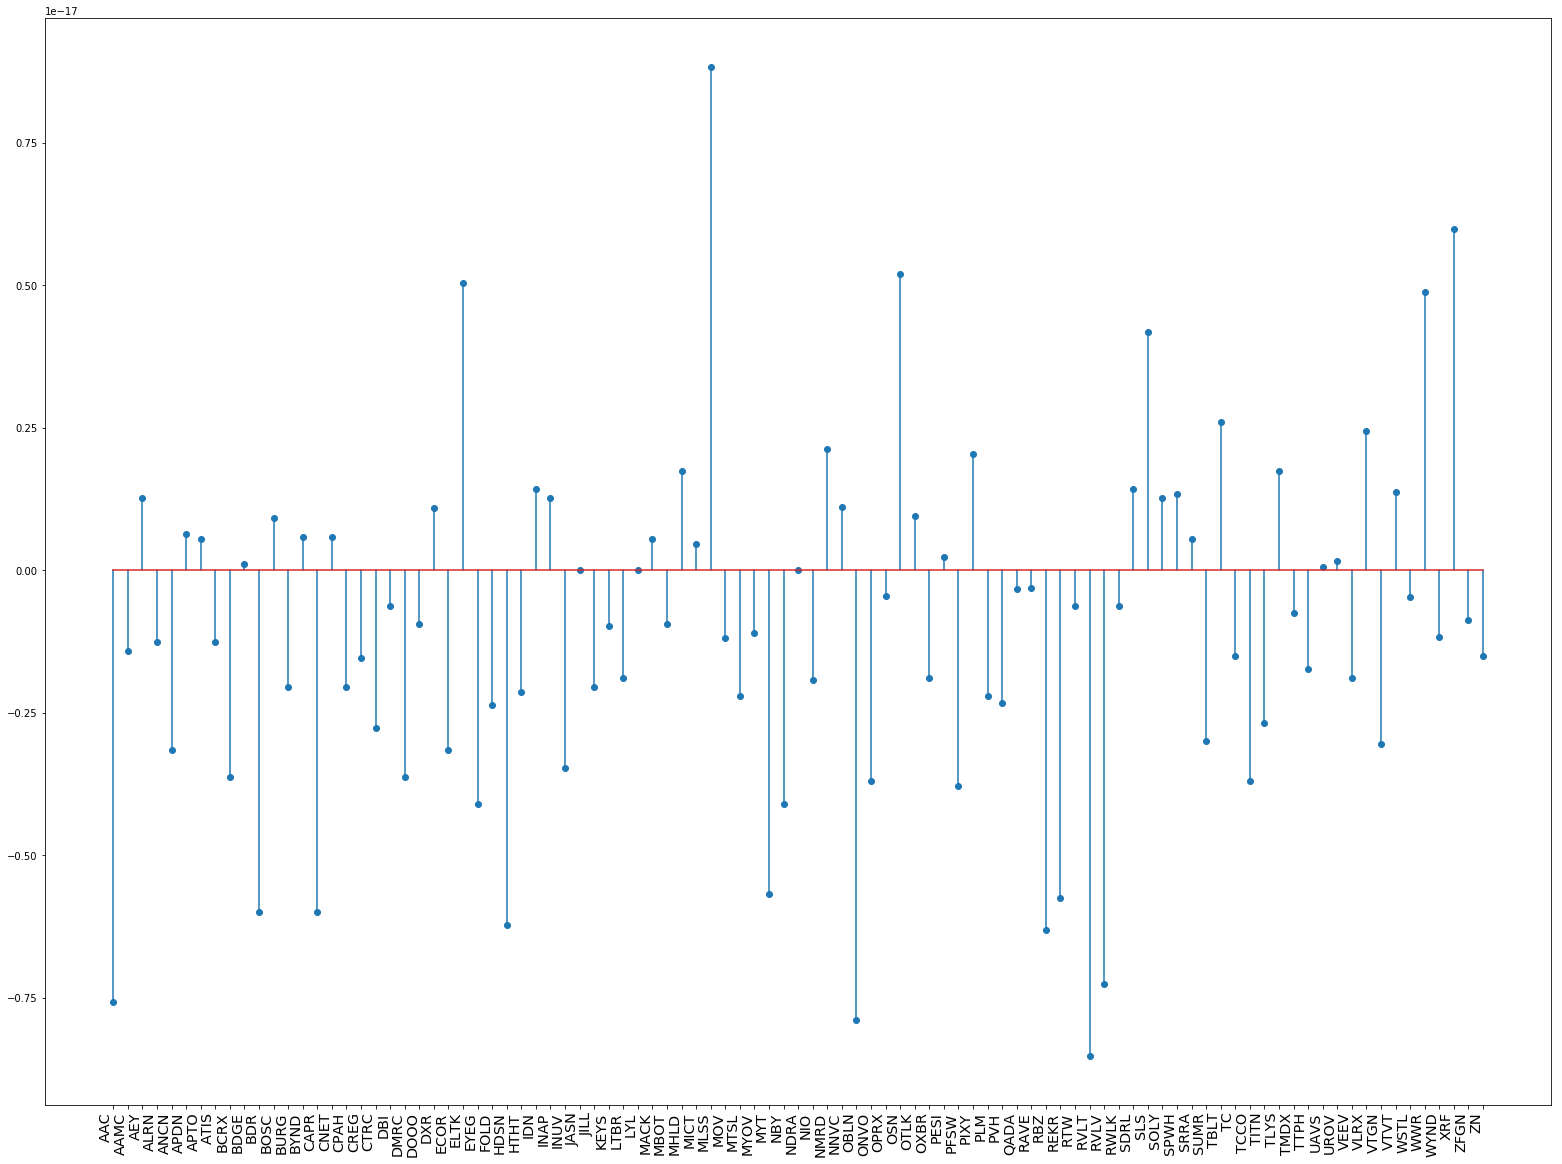

In [5]:
#Visualizing the active returns 

x = pd.DataFrame(ALPHA,columns=['Values'])
x['Stock'] = List
plt.rcParams["figure.figsize"] = (27,20)
plt.stem(x['Stock'] , x['Values'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.show()

Alpha Size :  (95, 44)


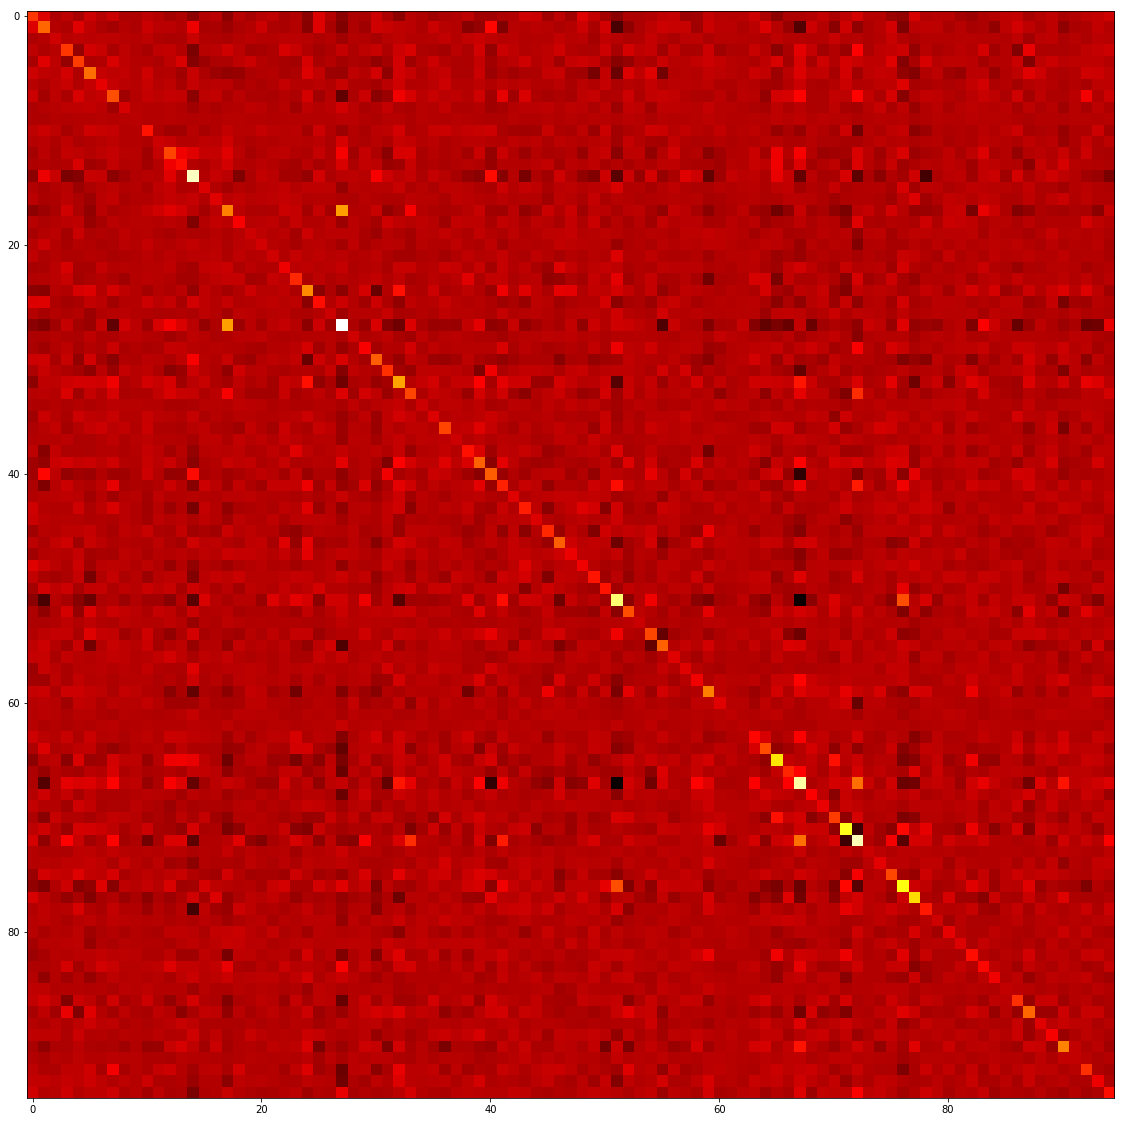

In [6]:
plt.imshow(SIGMA,cmap = 'hot')
#for i in range(95):
#    print(SIGMA[i,0])
print('Alpha Size : ',alpha.shape)

In [7]:
#calculating wieghts using MVP :

R = ALPHA
R = np.reshape(R,(95,1))
I = np.ones((N,1))
V = SIGMA
V_inv = np.linalg.inv(V)

a = float(np.matmul(np.matmul(R.T,V_inv),R))
b = float(np.matmul(np.matmul(R.T,V_inv),I))
c = float(np.matmul(np.matmul(I.T,V_inv),I))

A = np.matrix([[a,b],[b,c]],dtype = 'float')
A_inv = np.linalg.inv(A)

r_star = (b/c)

lamda_halfs = np.matmul(A_inv,([[r_star],[1]]))


In [ ]:
float(lamda_halfs[1])

In [8]:
#R.shape
x = float(lamda_halfs[0])*np.matmul(V_inv,R) + float(lamda_halfs[1])*np.matmul(V_inv,I)
print(sum(x))
print(x)

[1.]
[[ 1.48827871]
 [-0.7213335 ]
 [ 0.02656031]
 [-0.91008768]
 [ 1.23857112]
 [ 0.17207409]
 [-1.52968889]
 [ 0.98067341]
 [ 0.81051414]
 [-4.52466867]
 [ 0.30044987]
 [-0.95066695]
 [ 1.33242929]
 [-1.2783024 ]
 [ 0.60110048]
 [-1.15611466]
 [-0.13717158]
 [ 1.72118846]
 [-0.36413391]
 [-4.64593789]
 [-0.18095474]
 [-0.47514008]
 [ 1.69359112]
 [ 0.70354484]
 [ 0.53442719]
 [ 0.5885437 ]
 [ 0.83656624]
 [ 0.52665058]
 [ 1.31550209]
 [-0.92268947]
 [-0.8196251 ]
 [-0.46083276]
 [-0.31908516]
 [-0.31069395]
 [ 1.04769693]
 [-0.43872069]
 [ 1.14674043]
 [ 1.69556011]
 [-0.27032778]
 [-1.04013904]
 [-1.45803434]
 [-0.2245716 ]
 [ 4.05774277]
 [-0.58454807]
 [ 0.12547487]
 [ 0.23487384]
 [ 0.51136569]
 [ 1.19386869]
 [ 1.49956422]
 [-0.45616287]
 [-0.9463533 ]
 [ 0.47331159]
 [ 1.95320354]
 [-1.21347702]
 [ 1.21089268]
 [ 1.59929149]
 [-2.47243409]
 [ 0.51336253]
 [-1.0580297 ]
 [ 0.13877089]
 [-0.90186461]
 [-1.55920724]
 [-2.31038303]
 [ 0.48616895]
 [ 1.18273625]
 [ 0.70246747]
 [ 1.

In [9]:
variance_of_portfolio = np.matmul(np.matmul(x.T,V),x)

variance_check = 8.67361738e-19*r_star + 3.43072332e-20
print(variance_check)
print(variance_of_portfolio)

3.430723319999995e-20
[[4.09812059e-18]]


     Weights Stocks      Risk
42  4.057743    MOV  0.031893
52  1.953204   ONVO  0.061275
82  1.913180   TTPH  0.046042
81  1.894969   TMDX  0.031285
87  1.860806   VTGN  0.065470
66  1.802249    RTW  0.051697
17  1.721188   CREG  0.070401
37  1.695560   MACK  0.024313
22  1.693591    DXR  0.037789
85  1.640860   VEEV  0.016837


<StemContainer object of 3 artists>

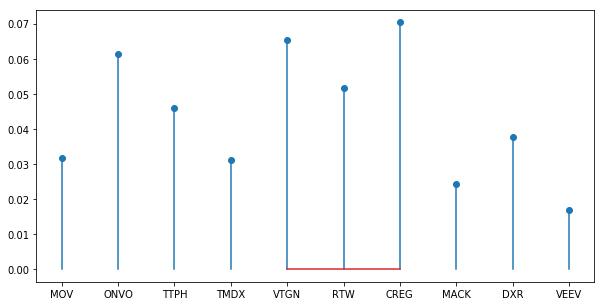

In [10]:
active_rate = pd.DataFrame( list(x),columns=['Weights'])
active_rate['Stocks'] = List
active_rate['Risk'] = np.sqrt(list(np.diag(SIGMA)))
top10_active = active_rate.nlargest(10,'Weights')


#plt.rcParams["figure.figsize"] = (15,15)
#plt.stem(active_rate['Stocks'] , active_rate['Risk'])

print(top10_active)
plt.rcParams["figure.figsize"] = (10,5)
plt.stem(top10_active['Stocks'] , top10_active['Risk'])


In [ ]:
lamb

In [ ]:
lamb1 = (lamb.T - lamb.mean(axis = 1))
sum(np.matmul(lamb1,lamb1.T))/(T**2)

In [ ]:
one_stock = pandas_datareader.DataReader('AAC','yahoo',datetime(2019,6,28),datetime(2019,8,31))
print(len(one_stock))
print(one_stock)
returns_one_stock1 = pd.DataFrame(np.log(one_stock['Adj Close'].values))
print(len(returns_one_stock1))
returns_one_stock = pd.DataFrame(np.diff(np.log(one_stock['Adj Close'].values)))
print(len(returns_one_stock))

In [ ]:
import seaborn as sns

Newdf = pd.DataFrame(ALPHA,columns=['Values'])
Newdf['Stock'] = List
print(Newdf)
plt.rcParams["figure.figsize"] = (27,20)
plt.stem(Newdf['Stock'] , Newdf['Values'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.show()